# Big data made simple-Runing Linear Regression in Python with Scikit-Learn

In [4]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


Librerías requeridas 

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.data.shape

(506, 13)

In [6]:
print(boston.feature_names)
#boston.DESCR
bos = pd.DataFrame(boston.data)
bos.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.columns = boston.feature_names
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

boston.target contains the housing prices

We are going to add these target prices to the bos data frame.

In [9]:
bos['PRICE'] = boston.target 
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Scikit Learn

In this section I am going to  fit a linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

First, I am going to import linear regression from sci-kit learn module. Then I am going to _drop_ the price column as I want only the parameters as my X values.  I am going to store linear regression object in a variable called lm.

In [10]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm =  LinearRegression()
lm

#  LinearRegression. + <tab> for more information about the function

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Important functions to keep in mind while fitting a linear regression model are:

__lm.fit() ->__ _fits a linear model_

__lm.predict() ->__ _Predict Y using the linear model with estimated coefficients_

__lm.score() ->__ _Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model._ 

You can also explore the functions inside lm object by pressing lm.<tab>

In [11]:
lm.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

## Fitting a Linear Model

I am going to use all 13 parameters to fit a linear regression  model.  Two other parameters that you can pass to linear regression object are fit_intercept and normalize.

In [20]: lm.fit(X, bos.PRICE)

Out[20]: LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

I am going to print the intercept and number of coefficients.

In [13]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.49110328036308


In [14]:
print(lm.coef_)


[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [13]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


I then construct a data frame that contains features and estimated coefficients

In [14]:
#pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimated'])

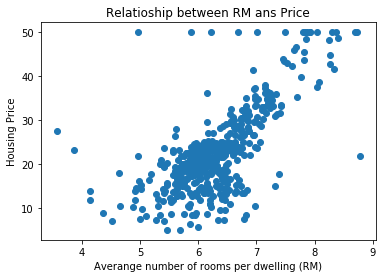

In [11]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Averange number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relatioship between RM ans Price")
plt.show()

## Predicting Prices


I am going to calculate the predicted prices (Y^i)  using _lm.predict._ Then I display the first 5 housing prices. These are my predicted housing prices.



In [14]:
lm.predict(X)

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483,
       18.9958266 , 21.58970854, 20.90534851, 19.55535931, 19.2837957 ,
       19.30000174, 20.52889993, 16.9096749 , 16.17067411, 18.40781636,
       12.52040454, 17.67104565, 15.82934891, 13.80368317, 15.67708138,
       13.3791645 , 15.46258829, 14.69863607, 19.54518512, 20.87309945,
       11.44806825, 18.05900412,  8.78841666, 14.27882319, 13.69097132,
       23.81755469, 22.34216285, 23.11123204, 22.91494157, 31.35826216,
       34.21485385, 28.0207132 , 25.20646572, 24.61192851, 22.94438953,
       22.10150945, 20.42467417, 18.03614022,  9.10176198, 17.20856571,
       21.28259372, 23.97621248, 27.65853521, 24.0521088 , 15.35989132,
       31.14817003, 24.85878746, 33.11017111, 21.77458036, 21.08526739,
       17.87203538, 18.50881381, 23.9879809 , 22.54944098, 23.37068403,
       30.36557584, 25.53407332, 21.11758504, 17.42468223, 20.78

In [17]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Then I plot a scatter plot to compare true prices and the predicted prices.

Text(0.5,1,'Prices vs Predited prices: $Y_i$ vs $\\hat{Y}_i$')

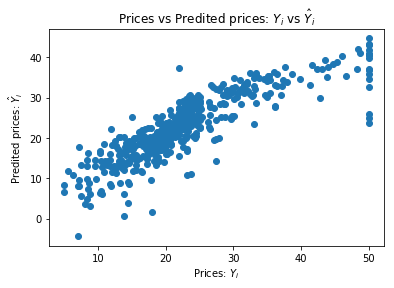

In [18]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predited prices: $\hat{Y}_i$")
plt.title("Prices vs Predited prices: $Y_i$ vs $\hat{Y}_i$")

## Mean Squared Error 

In [15]:
msFull = np.mean((bos.PRICE - lm.predict(X)) **2)
print(msFull)

21.897779217687518


In [16]:
lm.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
msPTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) **2 )
print(msPTRATIO)

62.65220001376924


## Training and validation data sets

In practice you wont implement linear regression on the entire data set, you will have to split the data sets into training and test data sets. So that you train your model on training data and see how well it performed on test data.

_How not to do train-test split:_

You have to divide your data sets randomly. Scikit learn provides a function called train_test_split to do this.

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#sklearn.

(339, 13)
(167, 13)
(339,)
(167,)


C:\Users\AMD\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train))**2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test))**2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534652
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.54136727561909


## Residual Plots 

Residual plots are a good way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

Text(0,0.5,'Residuals')

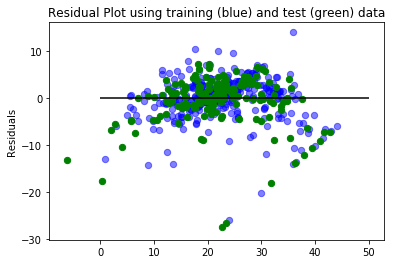

In [21]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c = 'b', s = 40, alpha = 0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')